In [1]:
#encoding: utf-8

#Importa as bibliotecas
import matplotlib.pyplot as plt
import scipy as sp
from scipy.fftpack import fft, fftfreq, fftshift
from scipy import signal
from IPython.display import Audio
from operator import itemgetter

''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

#1) Considere o tons do sistema de sinalização DTMF do laboratório anterior, apenas a tecla 1.

''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

''

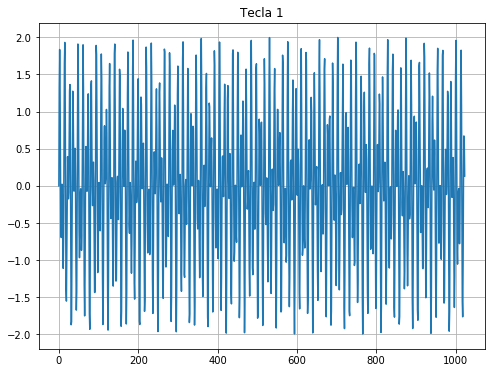

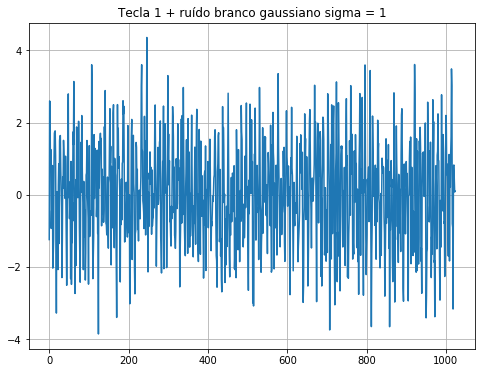

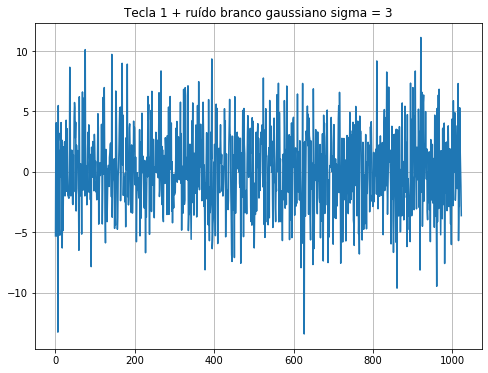

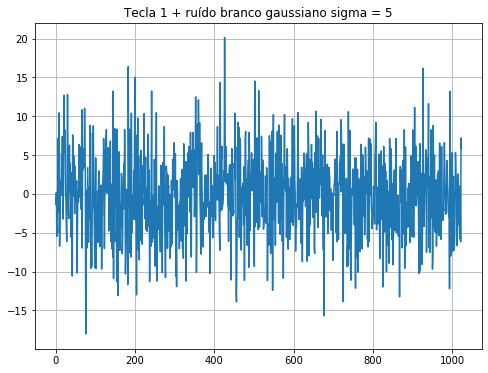

In [3]:
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

#3) Gerar sinais x1, x3 e x5 com 1024 amostras da tecla '1' com ruído gaussiano branco adicionado, com desvio padrão
#sigma=1, sigma=3 e sigma=5, respectivamente. Considere taxa de amostragem Fs=8000. Visualize os sinais no tempo.

''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

Fs = 8000                   
Ts = 1 / Fs                 
t = 0.128                   #Tempo de amostragem
n = sp.arange(0, t, Ts)     #Vetor de amostras (1024 amostras no total)

f1 = sp.sin(2 * sp.pi * 1209 * n)
f2 = sp.sin(2 * sp.pi * 697 * n)
tecla_1 = f1 + f2

x1 = tecla_1 + sp.random.normal(0, 1, 1024)
x3 = tecla_1 + sp.random.normal(0, 3, 1024)
x5 = tecla_1 + sp.random.normal(0, 5, 1024)

plt.figure(figsize = (8, 6))
plt.grid()
plt.title('Tecla 1')
plt.plot(tecla_1)

plt.figure(figsize = (8, 6))
plt.grid()
plt.title('Tecla 1 + ruído branco gaussiano sigma = 1')
plt.plot(x1)

plt.figure(figsize = (8, 6))
plt.grid()
plt.title('Tecla 1 + ruído branco gaussiano sigma = 3')
plt.plot(x3)

plt.figure(figsize = (8, 6))
plt.grid()
plt.title('Tecla 1 + ruído branco gaussiano sigma = 5')
plt.plot(x5)

plt.show()


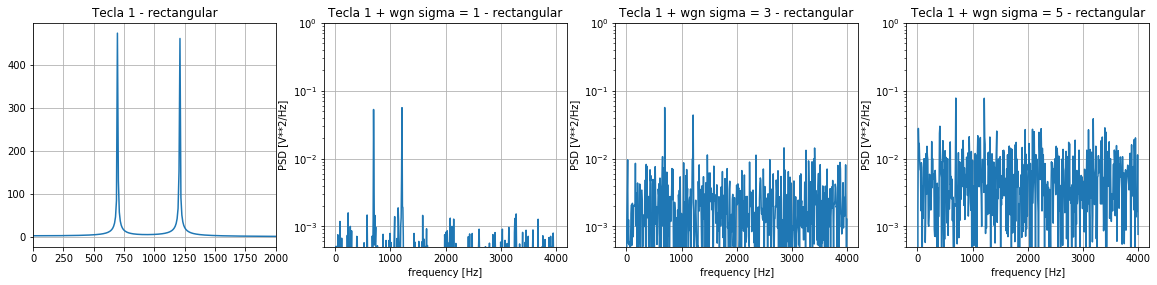

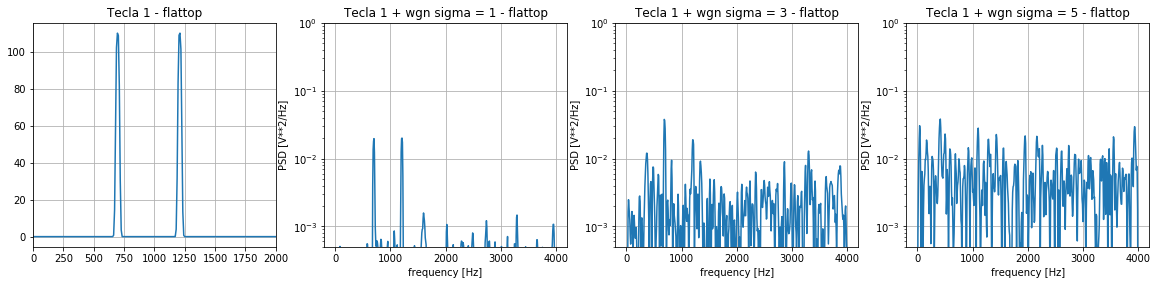

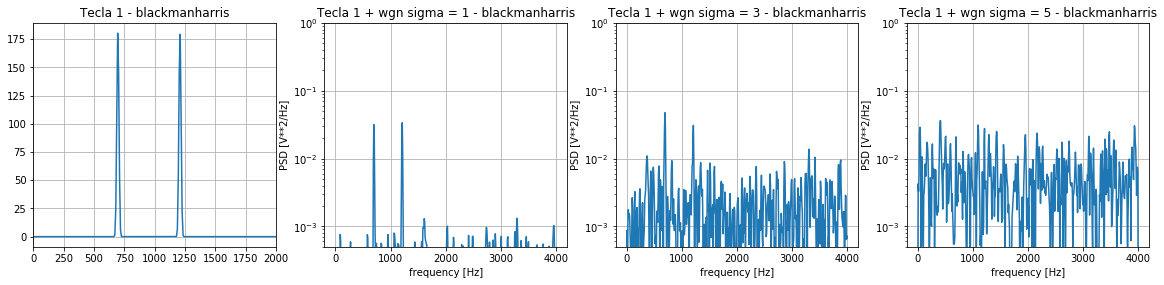

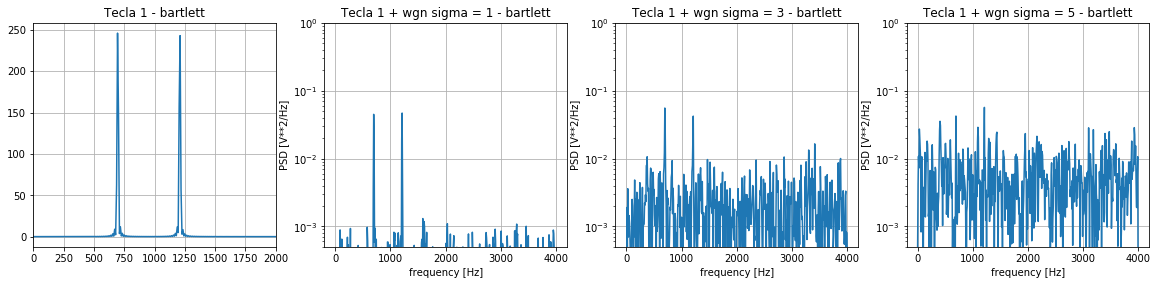

In [ ]:
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

#5) Plote o sinal em frequência usando 4 métodos diferentes para a estimativa do espectro (periodograma de Welch 
#com diferentes janelas (tipo / tamanho).

''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

N = 1024
x = sp.linspace(0.0, N * Ts, N)

xf = fftfreq(N, Ts)
xf = fftshift(xf)

plt.figure(figsize = (20, 14))

plt.subplot(3, 4, 1)
plt.xlim([0, 2000])
plt.grid()
plt.title('Tecla 1 - rectangular')
plt.plot(xf, abs(fftshift(fft(tecla_1 * signal.kaiser(1024, 0)))))

plt.subplot(3, 4, 2)
plt.grid()
plt.title( 'Tecla 1 + wgn sigma = 1 - rectangular')
f, Pxx_den = signal.welch(x1, Fs, ('kaiser', 0), nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(3, 4, 3)
plt.grid()
plt.title('Tecla 1 + wgn sigma = 3 - rectangular')
f, Pxx_den = signal.welch(x3, Fs, ('kaiser', 0), nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(3, 4, 4)
plt.grid()
plt.title('Tecla 1 + wgn sigma = 5 - rectangular')
f, Pxx_den = signal.welch(x5, Fs, ('kaiser', 0), nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.figure(figsize = (20, 14))

plt.subplot(3, 4, 1)
plt.xlim([0, 2000])
plt.grid()
plt.title('Tecla 1 - flattop')
plt.plot(xf, abs(fftshift(fft(tecla_1 * signal.flattop(1024)))))

plt.subplot(3, 4, 2)
plt.grid()
plt.title( 'Tecla 1 + wgn sigma = 1 - flattop')
f, Pxx_den = signal.welch(x1, Fs, 'flattop', nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(3, 4, 3)
plt.grid()
plt.title('Tecla 1 + wgn sigma = 3 - flattop')
f, Pxx_den = signal.welch(x3, Fs, 'flattop', nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(3, 4, 4)
plt.grid()
plt.title('Tecla 1 + wgn sigma = 5 - flattop')
f, Pxx_den = signal.welch(x5, Fs, 'flattop', nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.figure(figsize = (20, 14))

plt.subplot(3, 4, 1)
plt.xlim([0, 2000])
plt.grid()
plt.title('Tecla 1 - blackmanharris')
plt.plot(xf, abs(fftshift(fft(tecla_1 * signal.blackmanharris(1024)))))

plt.subplot(3, 4, 2)
plt.grid()
plt.title( 'Tecla 1 + wgn sigma = 1 - blackmanharris')
f, Pxx_den = signal.welch(x1, Fs, 'blackmanharris', nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(3, 4, 3)
plt.grid()
plt.title('Tecla 1 + wgn sigma = 3 - blackmanharris')
f, Pxx_den = signal.welch(x3, Fs, 'blackmanharris', nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(3, 4, 4)
plt.grid()
plt.title('Tecla 1 + wgn sigma = 5 - blackmanharris')
f, Pxx_den = signal.welch(x5, Fs, 'blackmanharris', nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.figure(figsize = (20, 14))

plt.subplot(3, 4, 1)
plt.xlim([0, 2000])
plt.grid()
plt.title('Tecla 1 - bartlett')
plt.plot(xf, abs(fftshift(fft(tecla_1 * signal.bartlett(1024)))))

plt.subplot(3, 4, 2)
plt.grid()
plt.title( 'Tecla 1 + wgn sigma = 1 - bartlett')
f, Pxx_den = signal.welch(x1, Fs, 'bartlett', nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(3, 4, 3)
plt.grid()
plt.title('Tecla 1 + wgn sigma = 3 - bartlett')
f, Pxx_den = signal.welch(x3, Fs, 'bartlett', nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(3, 4, 4)
plt.grid()
plt.title('Tecla 1 + wgn sigma = 5 - bartlett')
f, Pxx_den = signal.welch(x5, Fs, 'bartlett', nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.show()